# 시계열 분석을 사용한 수요 예측 및 재고 관리 최적화 사례 - 김형일 (AWS), 이환기 (신세계I&C) :: re:Invent 2020 공부 및 정리

## 사진  출처 - [https://www.youtube.com/watch?v=yKymTXu2ZS8&list=RDCMUCM9urpxJaoPf-j1cV9pGszg&index=22](https://www.youtube.com/watch?v=yKymTXu2ZS8&list=RDCMUCM9urpxJaoPf-j1cV9pGszg&index=22)


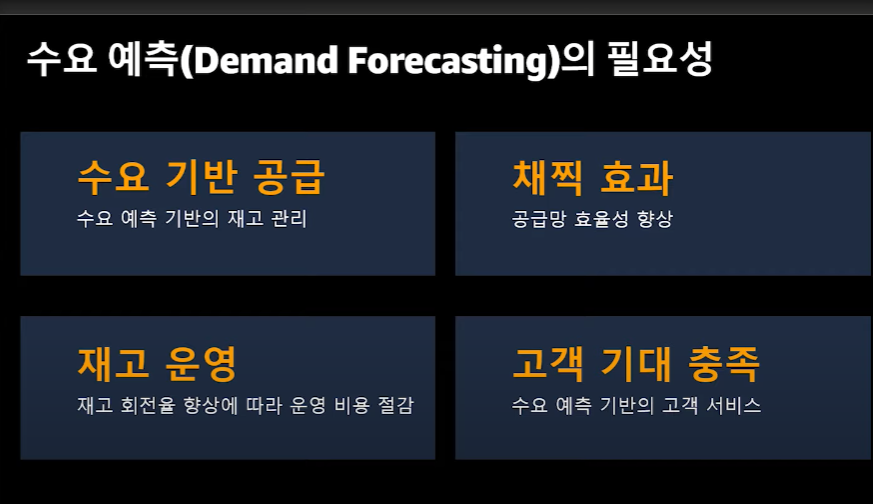

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_1.png")

## 전통적인 통계 방식의 한계

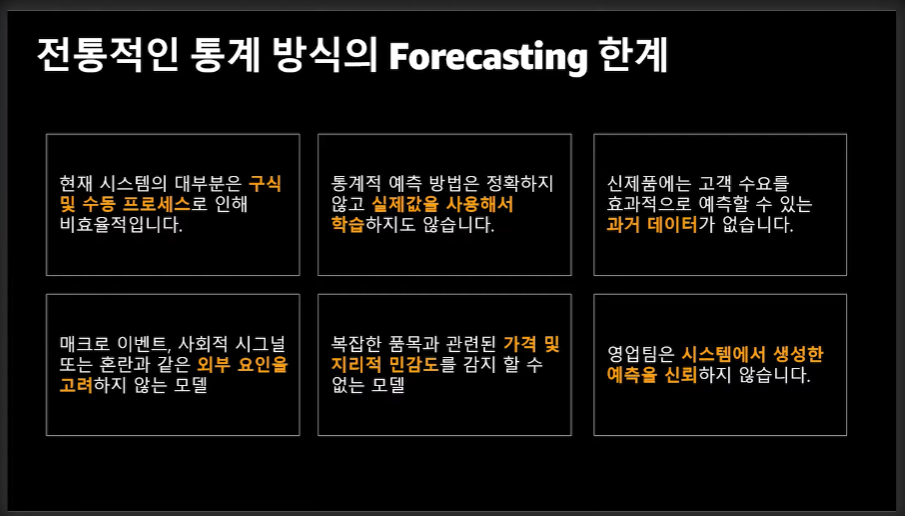

In [2]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_2.png")

예측은 개인의 사사로운 결정 뿐 아니라 가구나 기업의 수·전력, 교통수단, 관광객, 기존 제품 및 신제품의 수요 등을
결정하는데 중요한 역할을 한다. 이 때 수요예측에서 발생되는 오차는 국가의 성장이나 기업의 매출에
아주 큰 영향을 미치기 때문에 이를 최소화해야하며 최대의 정확도를 갖췄을 때 잘 된 수요예측이라 할
수 있다.
전통적으로 쓰이고 있는 수요예측기법에는 시계열분석법과 회귀분석법이 있다. 

시계열분석법은 일정한 시간 간격을 두고 기록된 데이터를 바탕으로 미래를 예측하며 대표적으로 autoregressive (AR), moving average (MA), autoregressive integrated moving average (ARIMA), exponential smoothing (지수평활법) 등이 있다. 

회귀분석법은 단일 또는 다수의 독립변수들과 종속변수 간의 관계를 찾기 위해 관계식을 추정하고, 추정된 관계식으로 독립변수들을 통해 미래를 예측하는 방법이다. 또 수요가 거의 없거나 전혀 없는 새로운 부품에 대한 보정된 예측을 하거나 간헐적인 수요패턴을 보이는 제품의 재고관리나 생산량에 대한 예측에는 베이지안 모델을 적용하기도 한다 (Bergman 등, 2017). 

그러나 최근에는 인공지능 기반의 수요예측기법을 활발히 적용하고 있는 추세이다. 
구글, 패션브랜드, 카드사 등 다양한 업체에서는 이미 인공신경망(artificial neural network; ANN)을 활용한 수요예측기법을 통해 다양
한 사업 및 서비스를 제공하고 있다. 

한 예로, 해외 패션 브랜드인 Zara에서는 빅데이터를 분석하여 수요예측 및 매장별 재고량을 파악하여 상품별 가격결정, 운송과정까지 실시간으로 파악할 수 있는 재고관리 시스템을 개발하여 공급망을 개선하고 있다 (Nenni 등, 2013). 또한 국내 기업의 한 예로 SK텔레콤은 SNS, 소셜데이터, 검색키워드를 바탕으로 고객, 사회 트렌드를 파악하여 자체적으로 개발한 빅데이터 기반의 서비스 모델을 기업이미지나 홍보에 적용하고 지속적으로 개발하고 있다. 
또 주요 카드 업체들은 소비자의 행동패턴을 분석하여 마케팅이나 신규상품 개발 및 상품추천에 활용하고 있다. 
KB국민카드의 경우, 실시간 마케팅 시스템의 개발로 고객의 현 상황에 가장 최적인 조건과 혜택을 제공하고 있다. 
이는 각 고객들에게 맞춤화된 최적의 서비스를 제공할 수 있으며 전략적인 마케팅 활동이 가능하다는 장점이 있다 (Kim, 2016).

또 다른 실제 사례로 Kim 등 (2017)은 T-커머스를 통한 시간별 매출 예측을 위해 deep neural network
(DNN)와 통계모델을 결합한 연구를 하였다. 
연구에 쓰인 데이터는 실제로 T-커머스를 운영하는 ㈜더블유쇼핑의 2015년 7월부터 2016년 9월까지의 판매 기록이다. 
입력 변수로 쓰인 요소는 정량화가 용이한 상품의 가격, 날짜, 요일, 휴일 여부, 날씨이다. 
그러나 결과적으로 시간대별 트렌드 분석을 통한 매출 예측에는 최근 3개월간의 데이터로 학습한 경우가 더 낮은 normalized mean absolute error(NMAE)를 보였음을 알 수 있었다. 
해당 연구에서 제안하는 매출 예측 과정의 특징은 T-커머스의 각 상품은 모든 시간대에 고르게 판매되지 않으므로 시간대별로 집계할 경우 데이터의 편중이 심하기 때문에 희박성의 문제를 고려한 것이다. 이를 해결하기 위해 가우시안 평활화를 진행한 통계적 모델과 특이
값 분해(singular value decomposition; SVD)를 적용하였으며 DNN과 함께 사용해서 희박성 문제와
예측 성능 문제를 동시에 고려할 수 있음을 알 수 있었다.





### 글 출처  - [https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO201910861318133&dbt=NART](https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO201910861318133&dbt=NART)

인공지능 기반 수요예측 기법의 리뷰 
A review of artificial intelligence based demand forecasting techniques

- 응용통계연구  정혜린 (중앙대학교 응용통계학과 ) ;  임창원 ( 중앙대학교 응용통계학과)

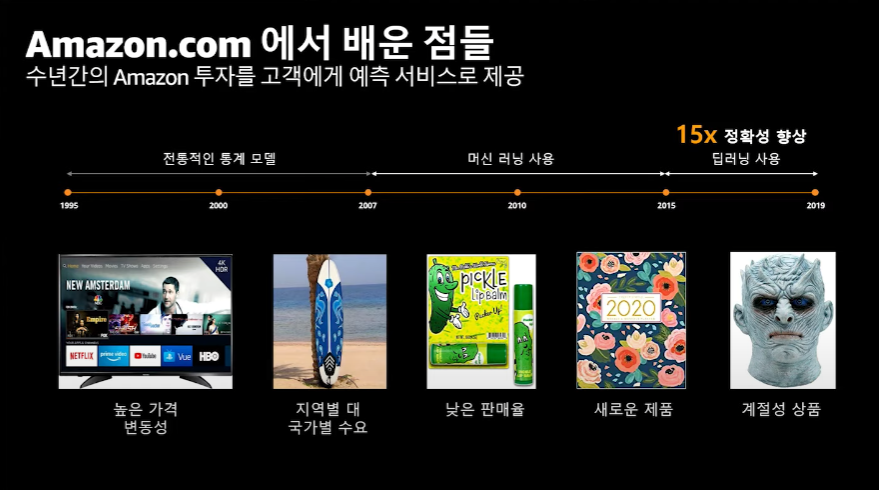

In [3]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_3.png")

- 2015년 이후 딥러닝 사용 결과 정확성 15x 향상 됨

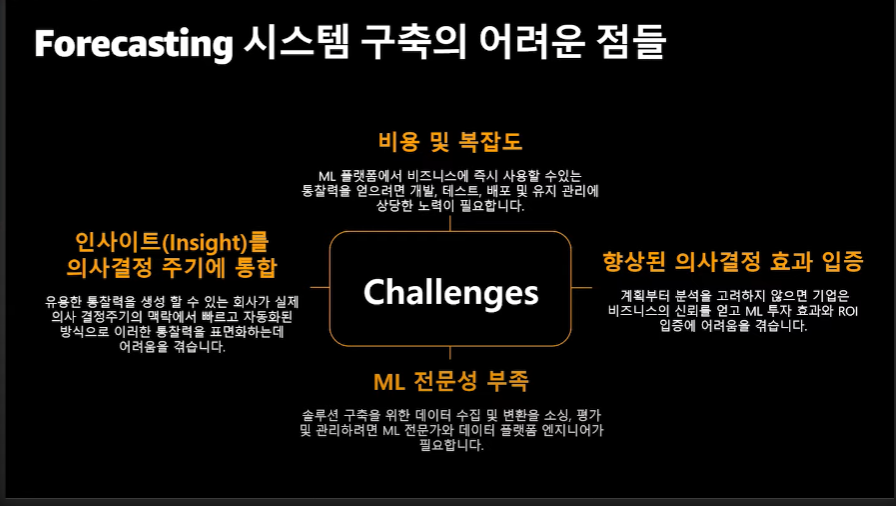

In [4]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_4.png")

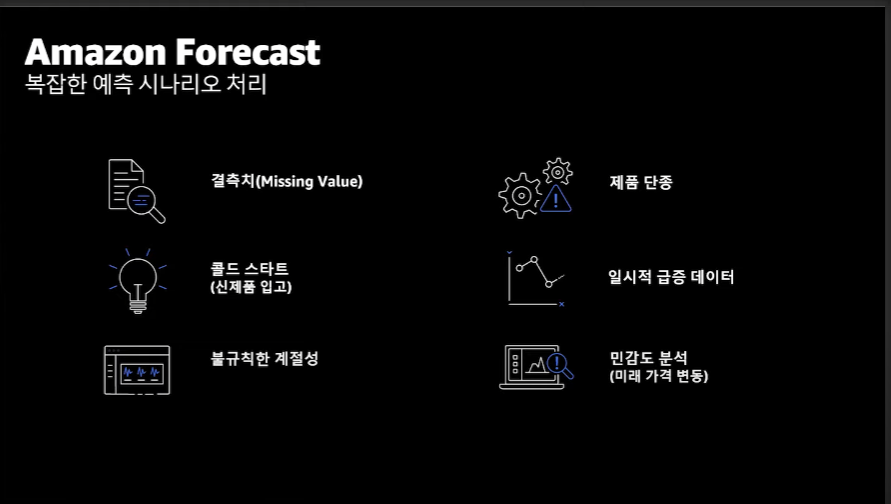

In [5]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_5.png")

## Amazon Forecast의 알고리즘

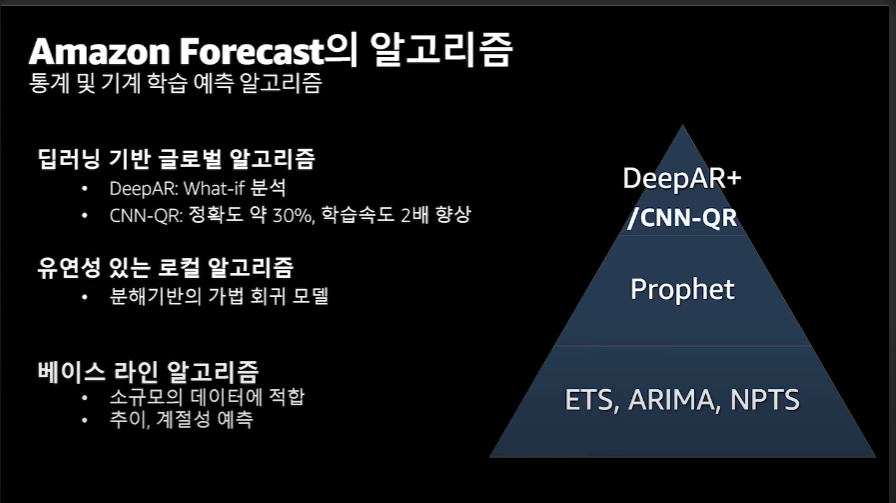

In [7]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_6.png")

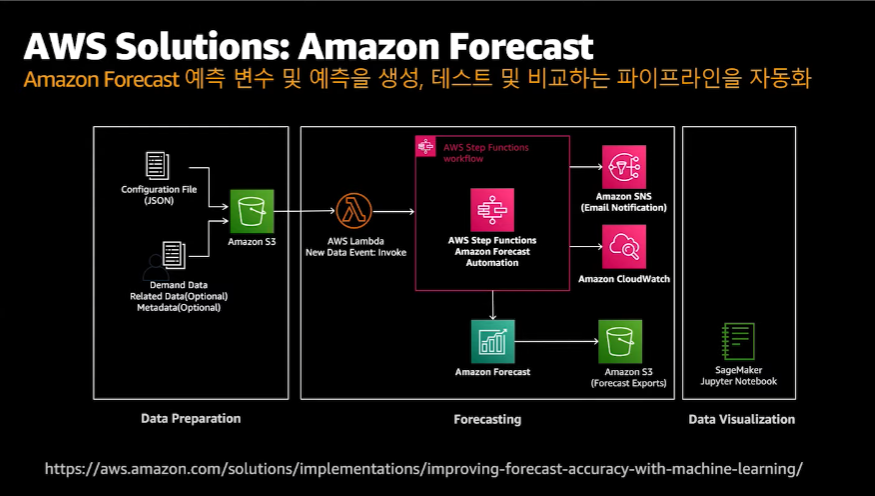

In [8]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_7.png")

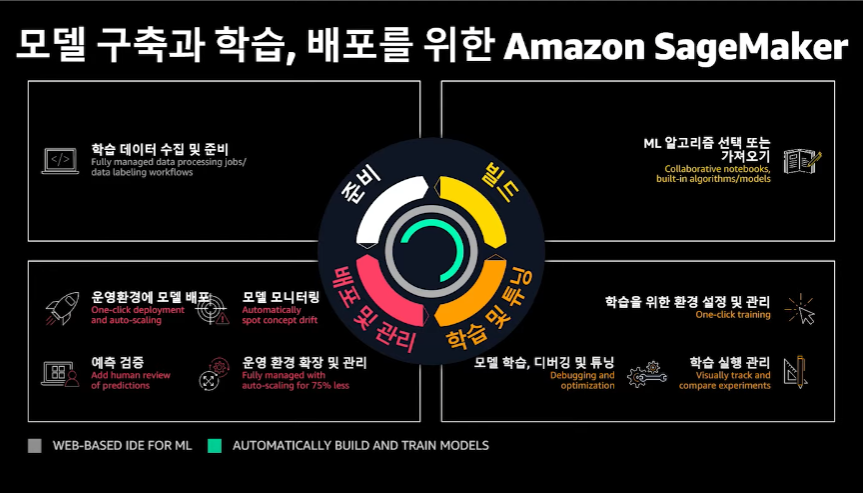

In [9]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_150214_8.png")

## 신세계아이앤씨, AI 수요예측 플랫폼 / SAICAST

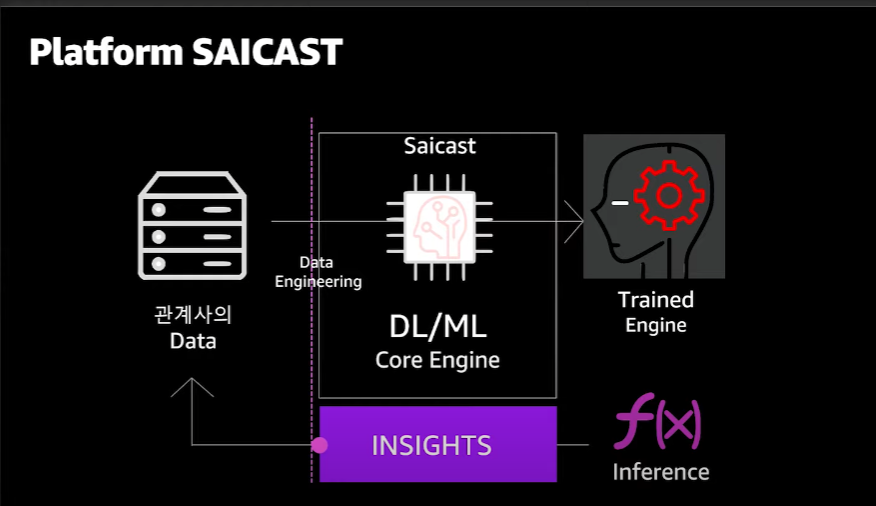

In [10]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_163644_1.png")

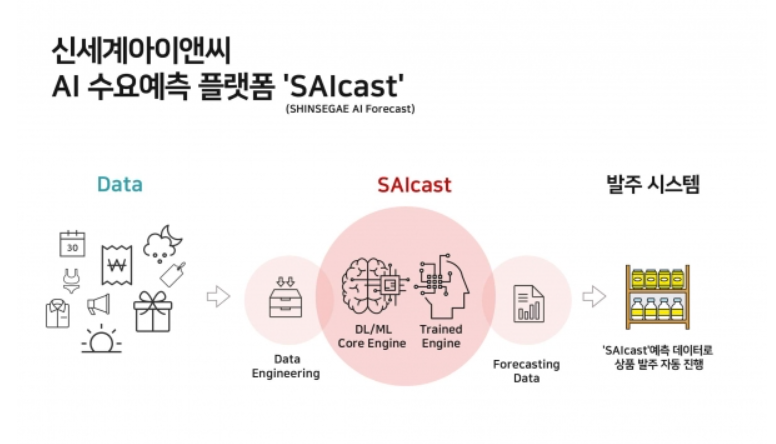

In [13]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_164001_1.png")

신세계아이앤씨가 6일 자체 개발한 AI 수요예측 플랫폼 ‘SAIcast (SHINSEGAE AI forecast, 이하 사이캐스트)’로 본격적인 사업화에 나선다고 밝혔다.

‘사이캐스트’는 자체 기술로 개발한 클라우드 기반 AI 수요예측 플랫폼으로 판매 데이터 이외에도 날씨, 가격, 프로모션, 시즌 등 수 백 가지 다양한 변수를 기반으로 상품 별 맞춤형 알고리즘 학습을 기반으로 일자·상품 별 판매량을 예측하여 발주도 자동으로 진행한다.

매장에서는 상품 폐기율, 결품으로 인한 판매기회 로스(Loss), 과다재고로 인한 재고관리 비용 등을 낮추고, 직원들의 업무 효율성을 더욱 높일 수 있다.

지난해 11월부터 이마트 2개 매장에 ‘사이캐스트’를 도입해 운영 중이다.

출처 : 팍스경제TV(http://www.paxetv.com)

- 사진출처 : [https://www.paxetv.com/news/articleView.html?idxno=89743](https://www.paxetv.com/news/articleView.html?idxno=89743)

- 팍스경제TV

"4월6일, 우리 매장에서 라면이 678개 팔릴 예정입니다. 적정 재고로 미리 발주하겠습니다"

신세계그룹 IT서비스 계열사 신세계아이앤씨는 자체 개발한 인공지능(AI) 수요예측 플랫폼 '사이캐스트'(SAIcast) 본격 사업확대에 나선다고 6일 밝혔다.

사이캐스트는 신세계아이앤씨가 자체기술로 개발한 클라우드 기반 AI 수요예측 플랫폼이다.

기존 유통매장은 과거 판매 데이터를 기반으로 자동 발주한 후, 매장 재고 상황에 맞춰 직원이 추가 발주업무를 담당했다. 그러나 수만 개 데이터를 학습한 사이캐스트는 대형마트에서 일자별로 어떤 상품이 얼마나 팔릴지 예측한 후, 필요한 상품 수량에 맞춰 자동으로 발주한다.


나아가 기존 판매 데이터와 날씨, 가격, 프로모션 등 유통 시장에 영향을 주는 수백 가지 변수를 계산하고 파악해 AI가 상품별 판매량을 정확하게 예측한다. 매장은 상품 폐기율, 결품 문제를 줄일 수 있고 과다재고로 인한 재고관리 비용 등을 낮출 수 있다.

사이캐스트는 구축형이 아닌 클라우드 기반 플랫폼으로 초기 구축비용의 부담이 낮다. 플랫폼을 도입하고자 하는 기업이 별도로 개발할 필요 없이 데이터만 확보하면 즉시 수요 예측을 한다. 또 웹기반의 대시보드와 마케팅에 활용할 수 있는 빅데이터 분석 도구를 제공한다.

신세계아이앤씨 측은 "기업이 가진 데이터 특성에 맞춰 커스터마이징도 가능해 더 정교하고 정확한 데이터 분석 결과를 도출할 수 있다"고 강조했다.

신세계아이앤씨는 지난해 11월부터 이마트 2개 매장에 사이캐스트를 도입해 운영하고 있다. 이 밖에도 뷰티 편집숍 시코르와 기술검증(PoC)을 진행하고 있다.

양윤지 신세계아이앤씨 IT2담당 상무는 "신세계아이앤씨는 단순한 AI 기술 연구가 아닌 유통 비즈니스에 적용하고 다양한 시장에 확대할 수 있는 AI 플랫폼 개발에 집중하고 있다"며 "사이캐스트는 자체 기술력으로 개발한 클라우드 기반 AI 수요예측 플랫폼으로 실제 대형 유통매장에서 효과를 입증한 만큼 올해부터 본격적으로 국내외 시장 확대에 박차를 가할 것"이라고 말했다.

신세계아이앤씨는 AI전담 조직을 통해 유통산업에 특화된 AI비즈니스 플랫폼을 개발하고 사업 확대에 나서고 있다. 지난해는 구글 기술 기반의 쇼핑 전용 AI챗봇 플랫폼 '사이보그'(SAIbog)를 개발해 신세계백화점, 신세계TV쇼핑에 도입했다.



- 출처 :[https://www.news1.kr/articles/?3897513](https://www.news1.kr/articles/?3897513)

- news1뉴스


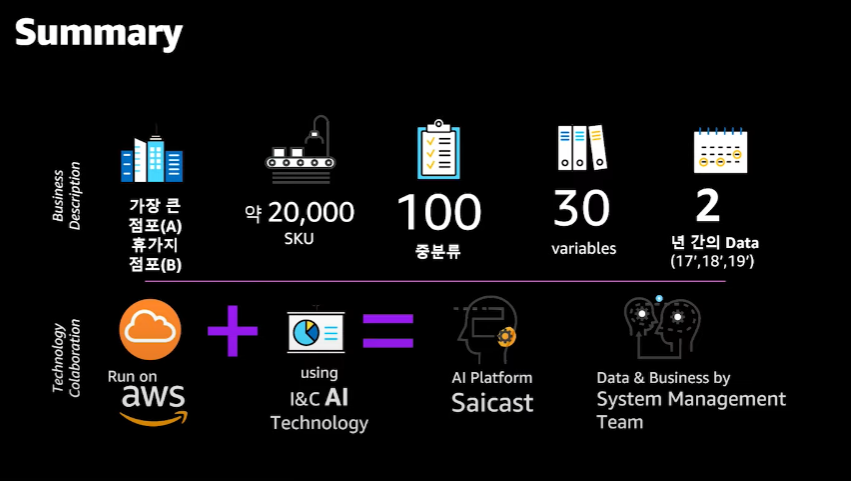

In [11]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_163644_2.png")

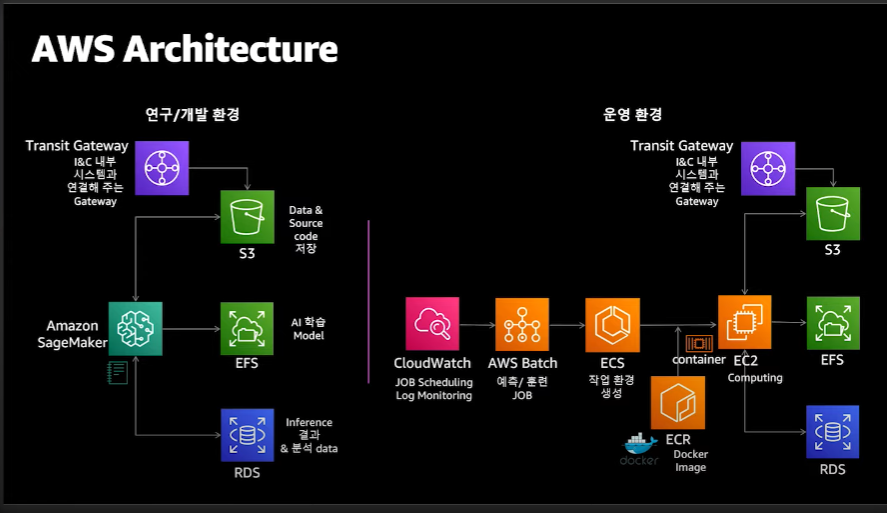

In [12]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_163644_3.png")

- 신세계는 aws lambda 대신 aws batch를 사용한다.

> AWS Lambda는 Amazon Web Services의 일부로 Amazon에서 제공하는 이벤트 중심의 서버리스 컴퓨팅 플랫폼입니다. 이벤트에 대한 응답으로 코드를 실행하고 해당 코드에 필요한 컴퓨팅 리소스를 자동으로 관리하는 컴퓨팅 서비스입니다.

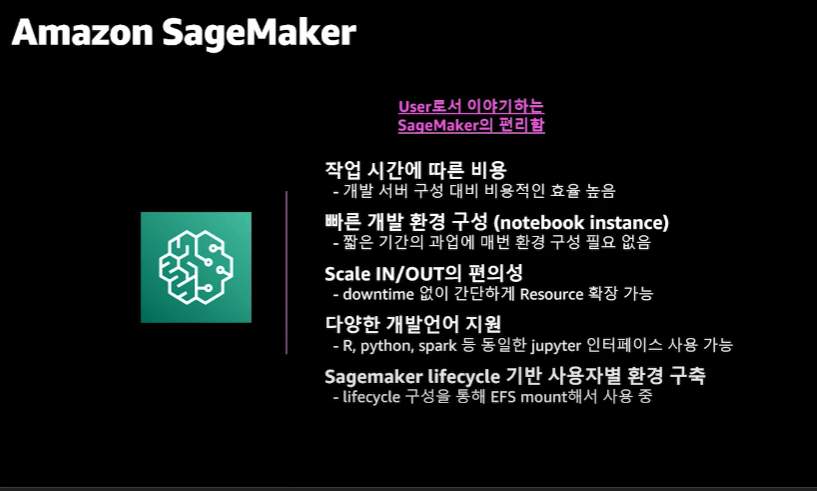

In [14]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_165555_1.png")

- sagemaker lifecycle 기반 사용자별 환경 구축 , EFS mount해서 사용 가능합니다.

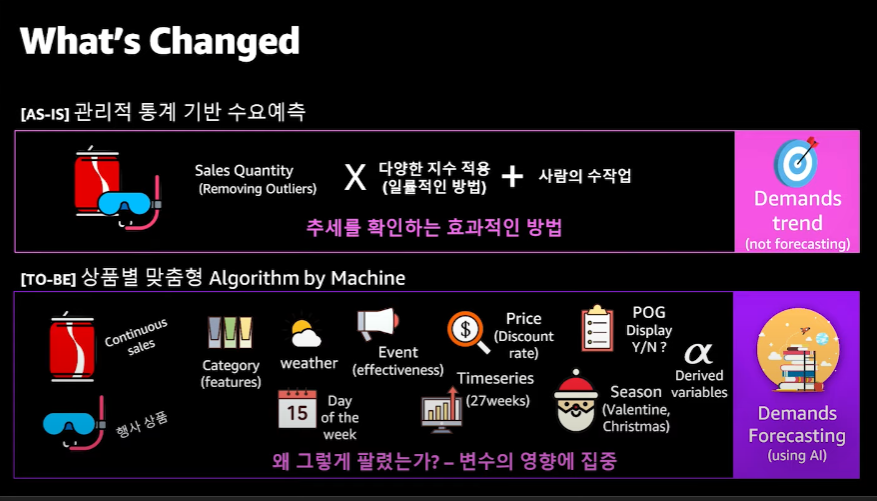

In [16]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_1.png")

- 신세계는 AI 적용시켜 상품별 맞춤형 수요예측 모델을 만들었다.

_____________________________________________________________

수요예측 기술을 적용하면 최적화된 공급 체인을 구축해 변동성을 줄이고, 재고 운영 비용을 절감할 수 있다. 절감한 비용만큼 가격 경쟁에서도 우위를 차지할 수 있는 장점을 제공한다.

다만 수요예측 시스템을 단기간에 적용하긴 쉽지 않다. 비즈니스 환경에 직접 영향을 미치는 만큼 높은 기술 전문성을 확보해야 하며, 복잡한 기계학습 서비스를 구축 및 운영하기 위한 전문인력도 필요하다.


신세계아이앤씨는 이러한 어려움을 극복하고 자체 기술을 기반으로 한국 유통환경에 맞는 AI를 만들고 플랫폼을 구축하기 위해 아마존 포어캐스트와 세이지메이커를 활용했다.

신세계아이앤씨 이환기 AI 팀장은 리인벤트에서 아마존의 기계학습(ML)서비스인 아마존 포어캐스트와 세이지메이커를 사용한 수요예측 및 제품 관리를 최적화한 방법을 소개했다.

포어캐스트는 통계 및 기계 학습 알고리즘을 사용하여 시계열 데이터를 예측하는 완전 관리형 서비스다. 전문적인 기계학습 역량 없이도 시계열 예측기술을 빠르게 활용할 수 있도록 결측치 처리와 불규칙 데이터 예측, 신제품 콜드 스타츠 예측 등의 기능을 지원한다.

세이지메이커는 기업에서 직접 기계학습 모델 구축과 훈련, 서비스 배포와 운영까지 할 수 있도록 지원하는 플랫폼이다.

이환기 팀장은 “AI를 직접 구축하고 운영하기로 한 이유는 유통 서비스 중 발생하는 다양한 예외사항에 대응해 필수적으로 커스터마이징이 필요하기 때문”이라며 “AI가 산업전반으로 널리 쓰이기 시작하면서 미래에 대비한 기술적 기반을 마련할 목적도 있었다”고 설명했다.

유통 과정에서 발생하는 어려움 3가지로 나뉜다. 과도한 발주로 인한 폐기상품 발생, 적은 발주로 인한 결품 그리고 수많은 상품 관리로 인한 인력 비용 증가다.

신세계아이앤씨는 자체 개발한 예측 엔진 ‘사이캐스트(SAICAST)와 아마존 포어캐스트, 세이지메이커를 활용해 제품 예측 최적화를 시도했다. 사이캐스트는 데이터 전처리 및 정제 작업을 비롯해 관계사의 데이터를 분석해 인사이트를 제공한다.

기계학습 모델 연구 및 개발을 위한 개발환경은 세이지메이커 노트북을 활용했다. 고사양 AI 서버의 사용시간을 유연하게 조정할 수 있어 비용 효율이 높기 때문이다. 빠른 개발환경 구성 기능을 지원해 짧은 POC나 데이터 검증 분석 작업도 빠르게 마칠 수 있다.

또한 간단하게 리소스 증감이 가능해 갑작스럽게 많은 리소스가 필요할 때 빠른 스케일업 등으로 유연하게 대처 가능하다.

개발된 AI모델을 실무에 투입하는 운영환경에서는 스케줄링을 위한 모니터링 서비스인 클라우드워치와 예측 및 훈련을 위해 AWS배치를 적용했다. 또한 140개 이상의 점포에 각각 대응하기 위해 점포별로 도커 기반 환경을 적용했다.

이환기 팀장은 “초기에는 람다를 활용했지만, 병렬작업에 제한이 있는 등 우리의 대규모 작업에는 적합하지 않아서 AWS배치를 사용하게 됐다”고 설명했다.

신세계아이앤씨는 AI기반 수요예측 시스템 도입 후 매 시기별 판매 상황과 수량 사이의 다양한 관계를 분석해 환경의 변화에 따른 판매량의 변화를 추론할 수 있게 됐다.

시뮬레이션 결과 기존 예측 방식은 이전 추세로만 분석하기 때문에 행사 등으로 인한 변화에 한 박자 늦게 반응했다. 반면 AI모델은 행사라는 변수의 효과를 고려해 정확한 타이밍에 예측 수량을 조절하는 것으로 나타났다.

평균 제곱근 편차(RMSE)에 따르면 기존 추론 방식에 비해 40%이상 정확도가 향상된 것으로 나타났다. 카테고리별 집계 결과에서는 98개 중분류 중 92개 분류에서 AI가 더 정확한 것으로 확인됐다. 예측오차도 18% 개선했다.

이환기 팀장은 “결과를 바탕으로 AI에 대한 가능성을 확인했고, 한 달간 검증기간을 거쳐 과제 대상이 된 두 점포에서 가공/일상 상품에 한해 AI기반 자동발주 서비스가 진행 중”이라며 “자동발주가 적용된 10개월간 한 번의 장애도 발생하지 않았다”고 말했다.

이어서 그는 “최근에는 변화가 빠르고 규모가 커 더욱 분석이 어려운 행사상품에 따른 예측을 위해 사이캐스트 엔진도 2.0 버전으로 개선했다”며 “1+1상품 등 이벤트로 인한 상품 체감 가격 분석 등 새로운 기능을 추가했다”고 설명했다.

- 출처 : [https://zdnet.co.kr/view/?no=20201217090126](https://zdnet.co.kr/view/?no=20201217090126)
- zdnet KOREA

## Work flow



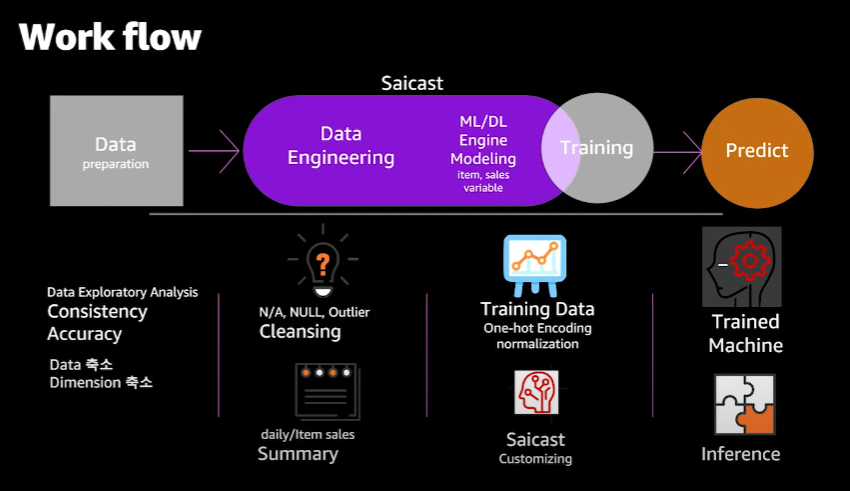

In [17]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_2.png")

## 평균 제곱근 편차(RMSE)- 예측력 판별

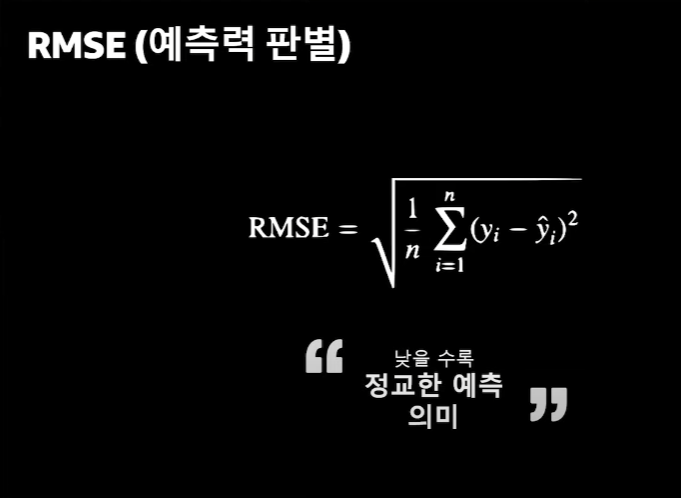

In [18]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_3.png")

## 기존 예측와 Saicast ML 예측 차이 

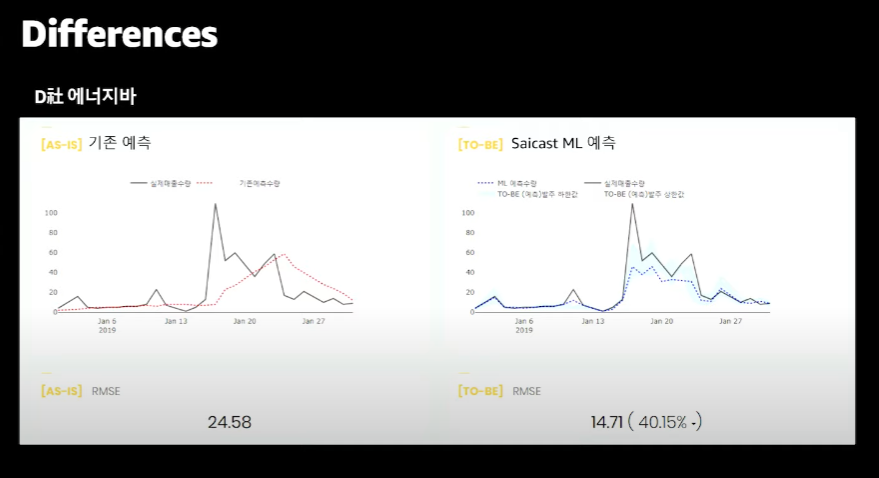

In [19]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_4.png")

> Saicast ML 예측이 기존 예측보다 RMSE가 낮다. 결과적으로 더 좋은 예측을 한다는 것을 위에 그림에서 확인 가능합니다

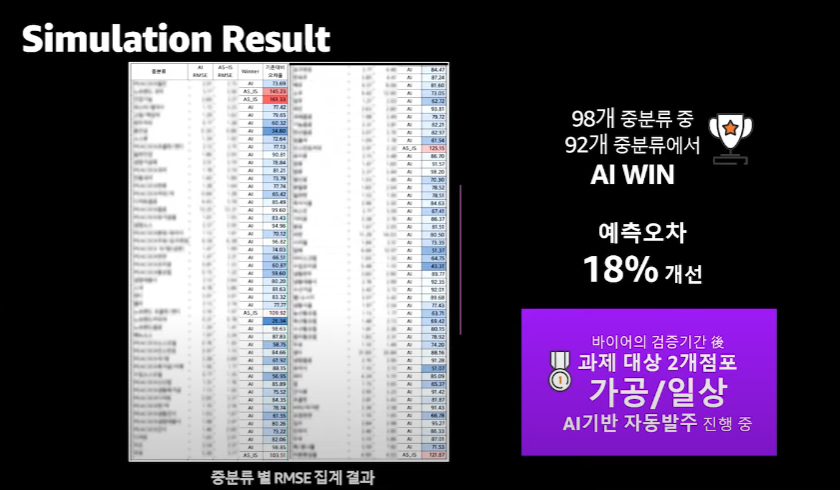

In [20]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_5.png")

## 신세계 행사상품에 적용된 Saicast 2.0

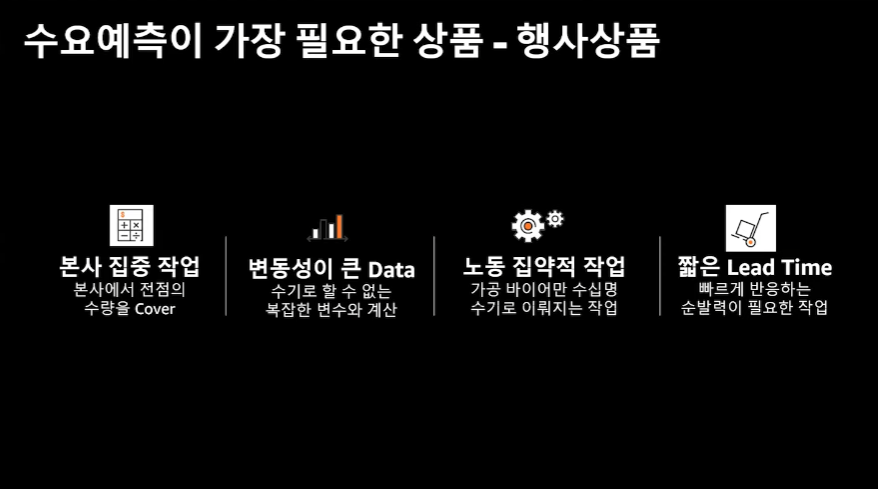

In [21]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_6.png")

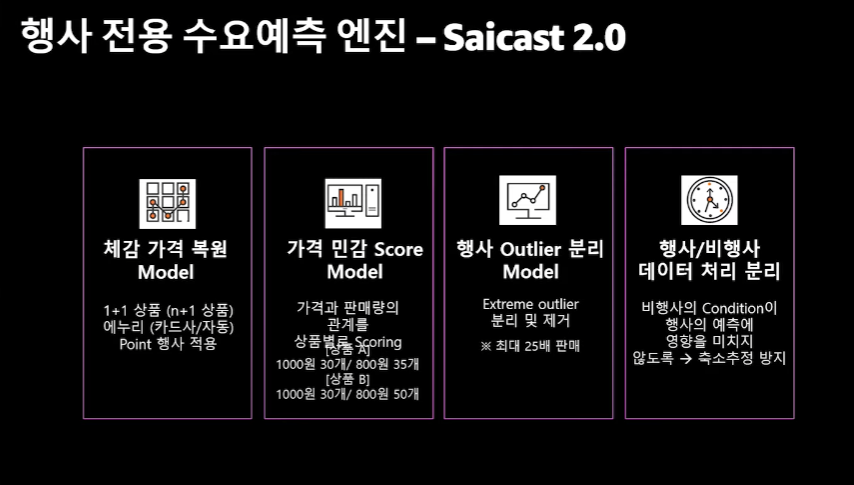

In [22]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_7.png") 

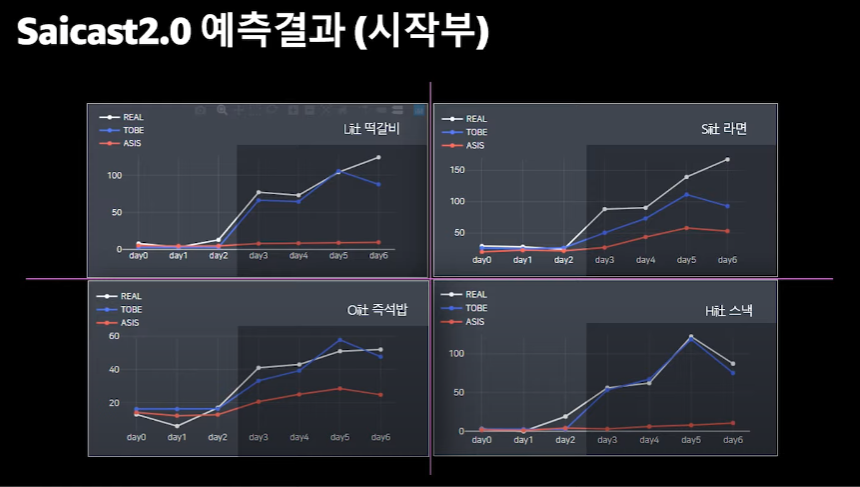

In [23]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_8.png")

> TOBE 파란선은 인공지능이 적용된 Saicast 2.0 선그래프이다. ASIS는 기본 통계방식으로 적용한 알고리즘이다.

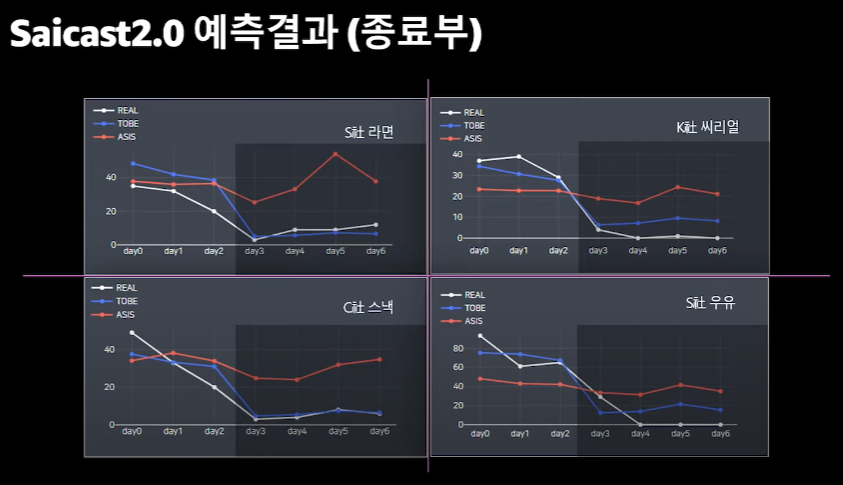

In [24]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_9.png")

> 행사가 종료되는 시점의 그래프에서도 Saicast 2.0이 더욱 잘 예측한다는 것을 위의 그래프에서 확인 가능하다

## 행사 기간 2주동안 행사 상품 발주량 비교

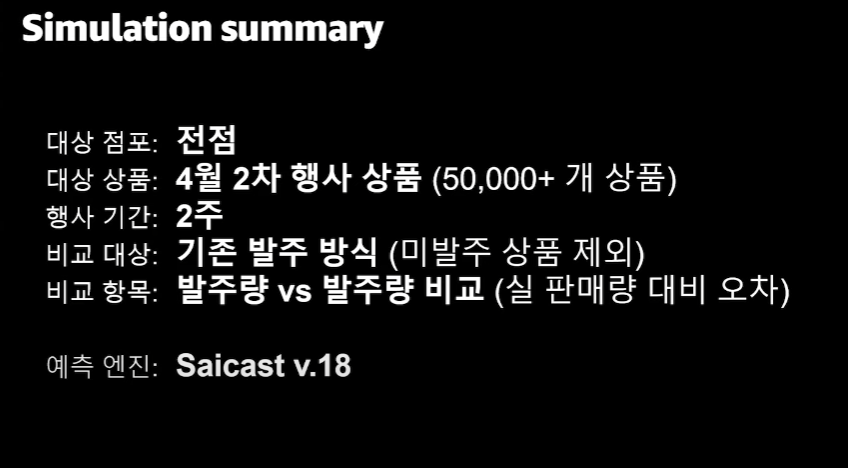

In [25]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_10.png")

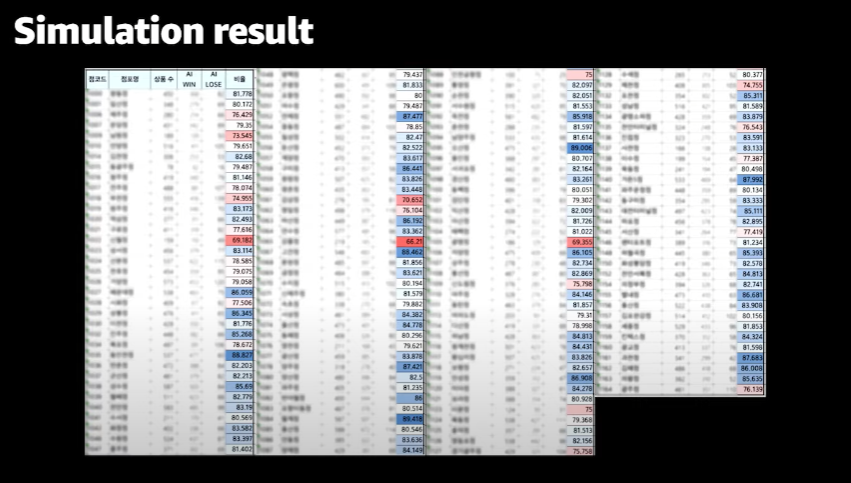

In [26]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_11.png")

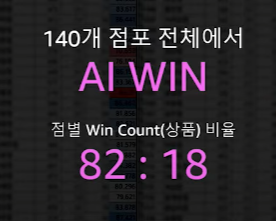

In [27]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/AWS/data/20220302_171811_12.png")

> 결론적으로 상품 발주 예측 량을 비교한 결과 AI를 활용한 Saicast가 기존 통계방식 보다 대략 5배 더 잘 맞추었다고 합니다.